In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from math import sqrt,pi,exp
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import scipy.stats as stats

In [2]:
datos = pd.read_csv("200530COVID19MEXICO.csv",encoding="latin-1")

In [5]:
datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-30,19f942,2,3,15,1,15,15,57,2,...,2,2,2,2,2,1,99,MÃ©xico,99,2
1,2020-05-30,0ae638,2,4,2,1,25,2,4,2,...,2,2,2,2,99,1,99,MÃ©xico,99,2
2,2020-05-30,02c8f8,2,4,8,2,8,8,19,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-30,105b61,2,4,15,2,15,15,9,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97
4,2020-05-30,142013,2,4,1,1,1,1,1,1,...,2,2,2,2,99,1,99,MÃ©xico,99,97


In [6]:
tabla=datos[['TIPO_PACIENTE','EDAD','SEXO','ENTIDAD_RES','RESULTADO','FECHA_DEF']]
tabla.head()

,TIPO_PACIENTE,EDAD,SEXO,ENTIDAD_RES,RESULTADO,FECHA_DEF
0,2,40,1,15,1,2020-05-15
1,2,46,1,2,1,9999-99-99
2,1,33,2,8,1,9999-99-99
3,1,37,2,15,1,9999-99-99
4,1,53,1,1,1,9999-99-99


Text(0, 0.5, 'NUMERO DE PERSONAS POR EDAD')

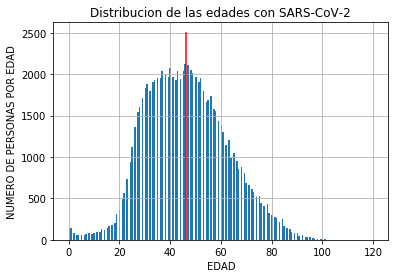

In [23]:
f1.EDAD.hist(bins=200)
plt.plot([medf1real,medf1real],[0,2500],color='RED')
plt.title("Distribucion de las edades con SARS-CoV-2")
plt.xlabel("EDAD") 
plt.ylabel("NUMERO DE PERSONAS POR EDAD")

In [9]:
f1=tabla[(tabla.RESULTADO==1)]
np.mean(f1.EDAD)

46.29422250662766

In [10]:
def MEDIA(X):
    n=len(X)
    c=sum([x for x in X])
    return(c/n)

In [12]:
medf1real=MEDIA(f1.EDAD)
medf1real

46.29422250662766

In [13]:
mediaf1=[]
for b in range(20000):
    m=np.random.choice(f1.EDAD,len(f1.EDAD))
    mediaf1.append(MEDIA(m))

In [14]:
I=(2*medf1real-np.quantile(mediaf1,1-.05/2)),(2*medf1real-np.quantile(mediaf1,.05/2))
I

(46.18875097129536, 46.39872531767072)

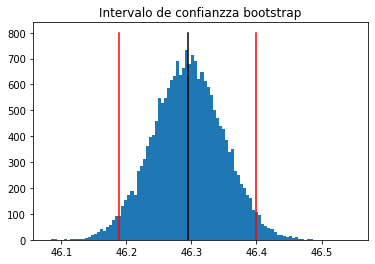

In [16]:
plt.hist(mediaf1,bins=100)
plt.title('Intervalo de confianzza bootstrap')
plt.plot([medf1real,medf1real],[0,800],color='black')
plt.plot([I[0],I[0]],[0,800],color='red')
plt.plot([I[1],I[1]],[0,800],color='red')